## E-field inside bounded charges

## สนามไฟฟ้าจากประจุรูปแบบใด ๆ
$$\mathbf{dE}=\frac{dq}{4\pi\epsilon_0}\frac{\mathbf{r-r'}}{|\mathbf{r-r'}|^3}$$
$$\mathbf{E(r)}=\int\mathbf{dE}$$

Line Charge Definition
$$dq=\rho_l(r')|d\mathbf{r'}|$$

Parameterised
$$dq=\rho_l(r')\left\|\frac{d\mathbf{r'}}{dt}\right\|dt$$

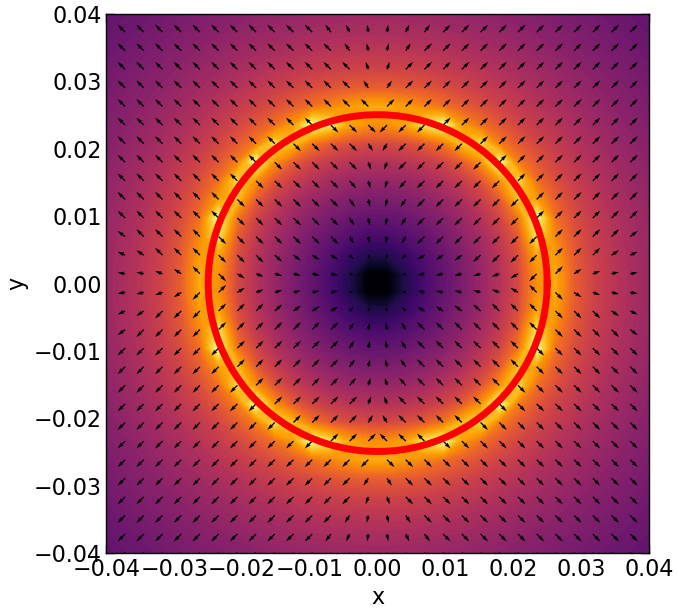

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from libemag.emag_initials import *
from libemag.plots import field_plot
import sympy as smp

#หาสนามไฟฟ้าเนื่องจากประจุแบบวงกลม รัศมี $2.5~cm$ ที่มีประจุรวม $Q=1~\mu C$ 

# ความหนาแน่นประจุ
Q = 1e-6
radius = 2.5e-2
rho_l = Q / (2.0 * pi * radius)

x, y, t = smp.symbols('x y t', real=True)
r = smp.Matrix([x, y])
rp = smp.Matrix([radius * smp.cos(t), radius * smp.sin(t)])
R = r - rp

dqdt = rho_l * smp.diff(rp, t).norm()

#smp.integrate(dqdt, [t, 0, 2.0 * np.pi])

# หา dEdt
dEdt = dqdt / (4.0 * pi * epsilon_0) * R / R.norm()**3
#dEdt

# Integrate
#smp.integrate(dEdt, [t, 0, 2.0 * np.pi])

#Symbolic Integration หาคำตอบไม่ได้ ดังนั้น ควรใช้ Numerical Integration

dExdt = smp.lambdify([t, x, y], dEdt[0])
dEydt = smp.lambdify([t, x, y], dEdt[1])

def E(x, y):
    Ex = quad(dExdt, 0, 2.0 * np.pi, args=(x, y))[0]
    Ey = quad(dEydt, 0, 2.0 * np.pi, args=(x, y))[0]
    return np.array([Ex, Ey])

#E(1, 2)

# Plot field
fig = plt.figure(figsize=(7, 7))
ax = field_plot(E, x_min=-4e-2, x_max=4e-2, y_min=-4e-2, y_max=4e-2, num_grids=30, contour=True, cmap='inferno')

# Plot the charge
t = np.linspace(0, 2.0 * np.pi, 100)
l = 2.5e-2 
x = l * np.cos(t)
y = l * np.sin(t)
plt.plot(x, y, color='r', linewidth=5)
plt.show()

In [23]:
# ขนาดของสนามไฟฟ้า E บนแนวแกน x
x = np.linspace(-5e-2, 5e-2, 100)
y = np.zeros(len(x))

E_f = np.vectorize(E, signature='(),()->(n)')
E_field = E_f(x, y)

C:\Users\nayot\AppData\Local\Temp\ipykernel_3324\409963876.py:37: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  Ey = quad(dEydt, 0, 2.0 * np.pi, args=(x, y))[0]


In [34]:
E_norm = []
for E in E_field:
    value = np.linalg.norm(E)
    E_norm.append(value)
E_norm = np.array(E_norm)
E_norm

array([4.47803190e+06, 4.71559359e+06, 4.97437668e+06, 5.25721122e+06,
       5.56745159e+06, 5.90910487e+06, 6.28699926e+06, 6.70700805e+06,
       7.17635203e+06, 7.70401444e+06, 8.30132124e+06, 8.98276947e+06,
       9.76723809e+06, 1.06798062e+07, 1.17545693e+07, 1.30391626e+07,
       1.46023419e+07, 1.65473592e+07, 1.90370905e+07, 2.23451090e+07,
       2.69706717e+07, 3.39361557e+07, 4.57286381e+07, 7.04481644e+07,
       1.58926809e+08, 4.42317010e+08, 8.31335346e+07, 4.39416045e+07,
       2.90715136e+07, 2.12870894e+07, 1.65123068e+07, 1.32888490e+07,
       1.09667647e+07, 9.21304612e+06, 7.83964010e+06, 6.73240167e+06,
       5.81805907e+06, 5.04741732e+06, 4.38619790e+06, 3.80975160e+06,
       3.29985980e+06, 2.84272088e+06, 2.42763809e+06, 2.04613800e+06,
       1.69136138e+06, 1.35763074e+06, 1.04013505e+06, 7.34692740e+05,
       4.37567664e+05, 1.45320082e+05, 1.45320082e+05, 4.37567664e+05,
       7.34692740e+05, 1.04013505e+06, 1.35763074e+06, 1.69136138e+06,
      

In [37]:
# List comprehension
E_norm = np.array([np.linalg.norm(E) for E in E_field])
E_norm

array([4.47803190e+06, 4.71559359e+06, 4.97437668e+06, 5.25721122e+06,
       5.56745159e+06, 5.90910487e+06, 6.28699926e+06, 6.70700805e+06,
       7.17635203e+06, 7.70401444e+06, 8.30132124e+06, 8.98276947e+06,
       9.76723809e+06, 1.06798062e+07, 1.17545693e+07, 1.30391626e+07,
       1.46023419e+07, 1.65473592e+07, 1.90370905e+07, 2.23451090e+07,
       2.69706717e+07, 3.39361557e+07, 4.57286381e+07, 7.04481644e+07,
       1.58926809e+08, 4.42317010e+08, 8.31335346e+07, 4.39416045e+07,
       2.90715136e+07, 2.12870894e+07, 1.65123068e+07, 1.32888490e+07,
       1.09667647e+07, 9.21304612e+06, 7.83964010e+06, 6.73240167e+06,
       5.81805907e+06, 5.04741732e+06, 4.38619790e+06, 3.80975160e+06,
       3.29985980e+06, 2.84272088e+06, 2.42763809e+06, 2.04613800e+06,
       1.69136138e+06, 1.35763074e+06, 1.04013505e+06, 7.34692740e+05,
       4.37567664e+05, 1.45320082e+05, 1.45320082e+05, 4.37567664e+05,
       7.34692740e+05, 1.04013505e+06, 1.35763074e+06, 1.69136138e+06,
      

Text(0, 0.5, '$|\\mathbf{E}(x, 0)|$')

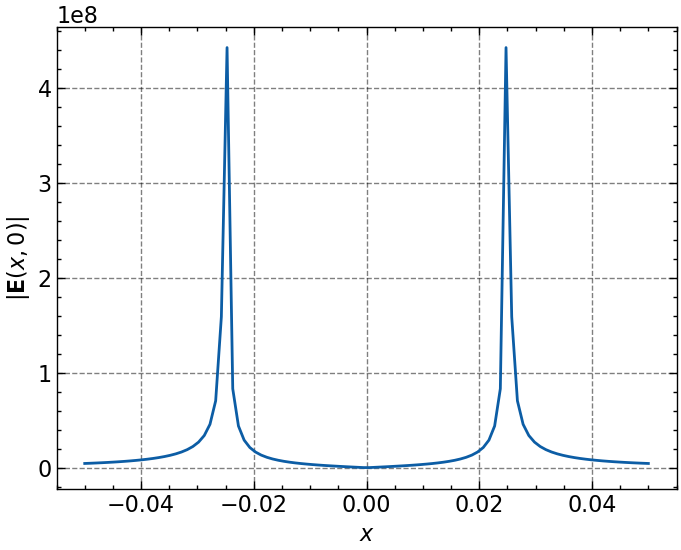

In [40]:
plt.plot(x, E_norm)
plt.xlabel(r'$x$')
plt.ylabel(r'$|\mathbf{E}(x, 0)|$')

## E-Field inside a hollowed spherical charge

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from libemag.emag_initials import *
from libemag.plots import field_plot
import sympy as smp
from scipy.integrate import dblquad